Descrição e possíveis anotações

*Parâmetros para a modelagem*:

In [1]:
#Bibliotecas
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

L= 0.05 #Comprimento normal da mola (m)
M= 0.04 #Massa da mola (kg)
Ks= 0.0957 #Constante elástica da mola (N/m)
g= 9.81#Força gravitacional
Le= L+M*g/(2*Ks)

*PRIMEIRA ITERAÇÃO*

In [2]:
def modelo1 (lista, t):
    y1=lista[0]
    y2=lista[1]
    vy1=lista[2]
    vy2=lista[3]
    Fel= Ks*(y1-y2-L)
        
    if y1-y2 <= L:
        
        vy2 = vy1 # os dois se chocaram e como o y2 não vai ter resistencia pq ele ta suspenso a velocidade dos dois se tornará igual
        dy2dt= vy2
        dvy2dt= -g    
        dy1dt= vy1
        dvy1dt= -g #Por enquanto. Futuramente pode ser acrescentada a Resis.Do ar, por exemplo
        
    dy2dt= vy2
    dvy2dt= -g + (2*Fel)/M   
    dy1dt= vy1
    dvy1dt= -g - (2*Fel)/M
    
    if y2<=0:
        dy2dt= 0
        dvy2dt=0
        
    if y1 <=0:
        dy1dt= 0
        dvy1dt= 0
    
    dxdt=[dy1dt,dy2dt,dvy1dt,dvy2dt]
    return dxdt

#Definindo o tempo da modelagem (Em segundos):
dt=1e-3
lista_t=np.arange (0,0.5,dt)

#Definindo as condições iniciais
y1_0=Le+0.3
y2_0=0.3
vy1_0=0
vy2_0=0
iniciais= [y1_0,y2_0,vy1_0,vy2_0]


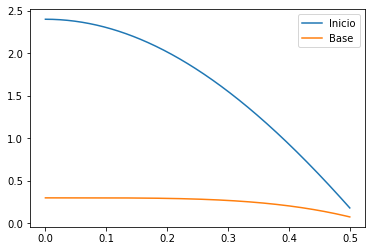

In [22]:
#Rodando a odeint:
x= odeint(modelo1,iniciais, lista_t)
lista_y1=x[:,0]
lista_y2=x[:,1]
lista_vy1=x[:,2]
lista_vy2=x[:,3]
plt.plot(lista_t,lista_y1, label="Inicio")
plt.plot(lista_t,lista_y2, label= "Base")
plt.legend()
plt.show()


*2°ITERAÇÃO*

In [19]:
def modelo2 (lista, t):
    y1 =lista[0]
    y2 =lista[1]
    y3 =lista[2]
    vy1=lista[3]
    vy2=lista[4]
    vy3=lista[5]
    Fel_12= 2*Ks*(y1-y2-(L/2))
    Fel_23= 2*Ks*(y2-y3-(L/2))
    dy1dt= vy1
    dy2dt= vy2
    dy3dt= vy3
    dvy1dt= -g - (3*Fel_12)/M
    dvy2dt= -g + ((3*Fel_12)/M) - (3*Fel_23)/M 
    dvy3dt= -g + (3*Fel_23)/M 
    
    if y1 <= y2 + L/2 :
        
         # os dois se chocaram e como o y2 não vai ter resistencia pq ele ta suspenso a velocidade dos dois se tornará igual
        vy2 = vy1
        
        dvy1dt= -g    
        dy1dt= vy1
         #Por enquanto. Futuramente pode ser acrescentada a Resis.Do ar, por exemplo
        dy2dt= vy2
        dvy2dt= -g
         
    if y2 <= y3 + L/2 :
        vy3 = vy1
        dy3dt= vy3
        dvy3dt= -g
        
        
        
    if y2<=L/2:
        dy2dt= 0
        dvy2dt=0
        
    if y1 <=L:
        dy1dt= 0
        dvy1dt= 0
        
    if y3<=0:
        dy3dt= 0
        dvy3dt=0
        
    dxdt=[dy1dt,dy2dt,dy3dt, dvy1dt,dvy2dt, dvy3dt]
    return dxdt






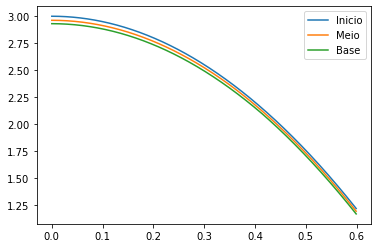

In [20]:
#Condições iniciais
y1_0= 3
y2_0= y1_0 - (L/2) - (M * g /3 * Ks)
y3_0= y1_0 - (L) - (M * g /2 * Ks)
vy1_0=0
vy2_0=0
vy3_0=0
iniciais= [y1_0,y2_0,y3_0,vy1_0,vy2_0, vy3_0]

x= odeint(modelo2,iniciais, lista_t)
lista_y1=x[:,0]
lista_y2=x[:,1]
lista_y3=x[:,2]
lista_vy1=x[:,3]
lista_vy2=x[:,4]
lista_vy3=x[:,5]
plt.plot(lista_t,lista_y1, label="Inicio")
plt.plot(lista_t,lista_y2, label="Meio")
plt.plot(lista_t,lista_y3, label= "Base")
plt.legend()
plt.show()